## Εθνικό Μετσόβιο Πολυτεχνείο 
## Σχολή Ηλεκτρολόγων Μηχανικών & Μηχανικών Υπολογιστών


### Μάθημα: Στοχαστικές διαδικασίες
### Διδάσκων: Μιχαήλ Λουλάκης
### Ακαδημαϊκό έτος: 2017-2018

### Ιωάννης Κ. Γεωργακόπουλος
### Α.Μ.: 03111512

# 6η Εργαστηριακή Άσκηση

#### Δειγματοληψία απόρριψης σε μεγάλες διαστάσεις.

Στο προηγούμενο εργαστήριο μάθαμε πώς μπορούμε να επιλέξουμε ομοιόμορφα ένα δείγμα από ένα χωρίο $D$ του επιπέδου και χρησιμοποιήσαμε αυτή τη μέθοδο για να υπολογίσουμε το εμβαδόν του δίσκου. Αυτή η μέθοδος μπορεί να επεκταθεί με προφανή τρόπο και σε περισσότερες διαστάσεις. Η ιδέα ότι αν πάρουμε τυχαία ένα σημείο μέσα στον κύβο με κέντρο το 0 και πλευρά 2, τότε η πιθανότητα αυτό να βρεθεί μέσα στη μοναδιαία μπάλα είναι 

$$p(d)=\frac{\omega(d)}{2^d}.$$

Επομένως αν πάρουμε έναν μεγάλο αριθμό $N$ από σημεία μέσα στον κύβο, από τον νόμο των μεγάλων αριθμών, το ποσοστό από αυτά που θα "πέσουν" μέσα στη μπάλα είναι μια καλή εκτίμηση της $p(d)$. Αυτό ακριβώς κάνει η συνάρτηση *vol* που ορίζεται στην παρακάτω ρουτίνα.

In [1]:
import numpy as np

from numpy import random

def vol(N,d):
    nhits = 0
    for i in range(N):
        x = random.uniform(-1,1,d)
        if sum(x ** 2) < 1: 
            nhits += 1
    return 2 ** d * nhits / N

d = 3
N = 10_000       
print ("The Monte Carlo estimate of ω(", d,") is  : %.5f " % vol(N,d))


The Monte Carlo estimate of ω( 3 ) is  : 4.15120 


Η παρακάτω συνάρτηση επιστρέφει τον όγκο της μοναδιαίας μπάλας σε $d$ διαστάσεις χρησιμοποιώντας τον αναλυτικό τύπο: 
    $$\omega(d) =\frac{\pi^{d/2}}{\Gamma\big(\frac{d}{2}+1\big)}$$ 

In [2]:
from math import gamma, pi 

def Vol1(d):
    x = d/2
    return pi ** x / gamma(x + 1)

print("The actual value of ω(", d,") is  : %.5f " % Vol1(d))

The actual value of ω( 3 ) is  : 4.18879 


## Παραδοτέο 1
*α) Γράψτε μια ρουτίνα που θα τυπώνει για διαστάσεις $d=2,3,...$ τον εκτιμόμενο με Monte Carlo όγκο της μοναδιαίας μπάλας σε $d$ διαστάσεις, την πραγματική τιμή του και το σχετικό σφάλμα της εκτίμησης. Η ρουτίνα σας θα πρέπει να επιλέγει $N=10^6$ σημεία στον αντίστοιχο κύβο κάθε διάστασης και θα πρέπει να φτάνει μέχρι εκείνη την τιμή της διάστασης που κανένα από τα $N$ επιλεγμένα σημεία δεν έπεσε στη μπάλα.* 

Για να ελεγξουμε αν κανένα από τα $Ν$ επιλεγμένα σημεία δεν έπεσε στην μπάλα, αρκεί το vol να είναι 0.

In [3]:
def d_check(Ν):
    d = 2           # set d
    est_vol = 1     # set est_vol for while to work properly
    while est_vol > 0:
        est_vol = vol(N,d)
        actual_vol = Vol1(d)
        print ("The Monte Carlo estimate of ω(", d,") is  : %.5f " % est_vol)
        print("The actual value of ω(", d,") is  : %.5f " % actual_vol)
        err = 100 * abs(1 - est_vol/actual_vol)
        print("The relative error is %.5f%%" % err)
        d += 1  # increment d, and repeat till est_vol reaches 0
    
    return d
    
N = 10**6    
print("Simulation stopped at ", d_check(N)," dimensions")
    
    
    

The Monte Carlo estimate of ω( 2 ) is  : 3.14174 
The actual value of ω( 2 ) is  : 3.14159 
The relative error is 0.00482%
The Monte Carlo estimate of ω( 3 ) is  : 4.18413 
The actual value of ω( 3 ) is  : 4.18879 
The relative error is 0.11130%
The Monte Carlo estimate of ω( 4 ) is  : 4.93760 
The actual value of ω( 4 ) is  : 4.93480 
The relative error is 0.05670%
The Monte Carlo estimate of ω( 5 ) is  : 5.27181 
The actual value of ω( 5 ) is  : 5.26379 
The relative error is 0.15234%
The Monte Carlo estimate of ω( 6 ) is  : 5.15834 
The actual value of ω( 6 ) is  : 5.16771 
The relative error is 0.18145%
The Monte Carlo estimate of ω( 7 ) is  : 4.69414 
The actual value of ω( 7 ) is  : 4.72477 
The relative error is 0.64812%
The Monte Carlo estimate of ω( 8 ) is  : 4.03610 
The actual value of ω( 8 ) is  : 4.05871 
The relative error is 0.55722%
The Monte Carlo estimate of ω( 9 ) is  : 3.26707 
The actual value of ω( 9 ) is  : 3.29851 
The relative error is 0.95306%
The Monte Carlo 

*β) Κάντε τη γραφική παράσταση $d- \log p(d)$ για τη θεωρητική τιμή της πιθανότητας $p(d)$. Εξηγήστε γιατί το σχετικό σφάλμα της εκτίμησης στο (α) είναι μεγάλο καθώς η διάσταση αυξάνει.*

Αρχικά καλούμε τη βιβλιοθήκη matplotlib.

In [4]:
import matplotlib.pyplot as plt  # library for plotting. We will call it plt in our code

# to plot the results in the notebook:
%matplotlib inline

Στη συνέχεια φτιάχνουμε τους x -y άξονες όπως έχουμε μάθει σε προηγούμενα εργαστήρια, λογαριθμίζοντας τον y.

In [5]:

# Create a list of real numbers from start to end by step
start, end, step = 2, 100, 1

x = np.arange(start, end, step)

y = []

for i in range(len(x)):    #Γεμίζουμε τη λίστα με append   
    y.append(Vol1(i)) 

y = np.log2(y) # λογαριθμίζουμε το y



Και σχηματίζουμε τελικά τη γραφική παράσταση $d- \log p(d)$ για τη θεωρητική τιμή της πιθανότητας $p(d)$

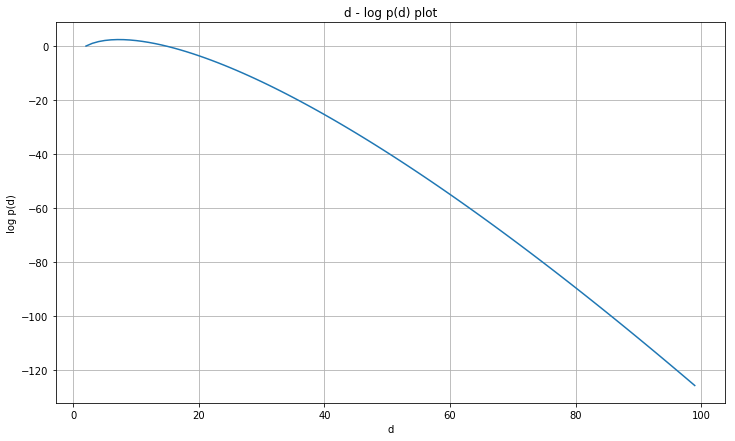

In [6]:
plt.figure(figsize=(12, 7))  # define figure size

plt.plot(x, y)
plt.xlabel('d')
plt.ylabel('log p(d)')
plt.title('d - log p(d) plot')
plt.grid(True)  # add grid-lines

Παρατηρούμε ότι όσο αυξάνονται οι διαστάσεις, η *log p(d)* μειώνεται δραματικά. Αυτό σημαίνει ότι η πιθανότητα να πέσουν μέσα στη μπάλα όσο αυξάνονται οι διαστάσεις, μειώνεται επίσης δραματικά. Γι'αυτό το λόγο καθώς αυξάνονται οι διαστάσεις πέρα από τις 2-3, το σφάλμα εκτίμησης εκτοξεύεται.

*γ) Αν θέλατε να πάρετε 1000 δείγματα στη μοναδιαία μπάλα 20 διαστάσεων με τη μέθοδο της απόρριψης όπως παραπάνω, πόσα περίπου δείγματα στον κύβο θα έπρεπε να φτιάξετε? Κάντε μια εκτίμηση του χρόνου που θα χρειαζόταν αυτό στον υπολογιστή σας.*

Δεδομένου ότι για ένα εκατομμύσιο δείγματα δεν έχω κανένα hit στις 19 διαστάσεις, πιάστ'αυγό και κούρεφτο. 

Μιας και δεν εστάλη μέηλ για την ανάρτηση της 6ης άσκησης και άργησα να το δω (φταίω φυσικά), θα αρκεστώ στην εκτίμηση ότι θα χρειαστεί πολλύυυυυυυυυυυυυυυυυυυυυυυυυυυυυυυυυυυυυυυυυυυυυυυυυυυυυυυυυυυυυυυυυυς χρόνος (πολύς πολύς). 

#### Δειγματοληψία με MCMC
Είδαμε παραπάνω ότι η μέθοδος της απόρριψης δεν είναι πρακτική για να κάνουμε δειγματοληψία από μια σφαίρα μεγάλων διαστάσεων. Θα δούμε τώρα πώς μπορούμε να λύσουμε αυτό το πρόβλημα χρησιμοποιώντας ιδέες από τις μαρκοβιανές αλυσίδες (Markov Chain Monte Carlo- MCMC)

Συγκεκριμένα, για μια μη υποβιβάσιμη μαρκοβιανή αλυσίδα με συμμετρικές πιθανότητες μετάβασης η μοναδική αναλλοίωτη κατανομή είναι η ομοιόμορφη κατανομή στον χώρο των καταστάσεων. Πράγματι, επειδή οι πιθανότητες μετάβασης είναι συμμετρικές ο πίνακας πιθανοτήτων μετάβασης θα είναι διπλά στοχαστικός και το ζητούμενο προκύπτει όπως στο Παράδειγμα 42 του Κεφαλαίου 5 του βιβλίου. Επομένως, προκειμένου να επιλέξουμε τυχαία ένα σημείο από ένα χωρίο $D$, μπορούμε να θεωρήσουμε μια μαρκοβιανή αλυσίδα που εξελίσσεται στο $D$, έχει συμμετρικές πιθανότητες μετάβασης και να την αφήσουμε να κάνει αρκετά βήματα ώστε να έρθει κοντά στην κατάσταση ισορροπίας της. 

Ένας τρόπος να το πετύχουμε αυτό είναι ο εξής. Έστω $X_n= x\in D$. Θα δοκιμάσουμε να μετακινηθούμε κατά $z$ όπου η κατανομή του βήματος $z$ είναι συμμετρική γύρω από το 0. Αν το σημείο $x+z$ παραμένει μέσα στο $D$ θα πραγματοποιήσουμε τη μετακίνηση, θα ορίσουμε δηλαδή $X_{n+1}=x+z$, διαφορετικά θα παραμείνουμε στο $x$, θα ορίσουμε δηλαδή $X_{n+1}=x$. Πεισθείτε ότι αυτός ο μηχανισμός παράγει συμμετρικές πιθανότητες μετάβασης.

Ο παρακάτω αλγόριθμος υλοποιεί αυτή την ιδέα για να πάρει 1.000 δείγματα από μια τυχαία μεταβλητή με ομοιόμορφη κατανομή στον μοναδιαίο δίσκο

$$
D_2=\{(x,y)\in\mathbb{R}^2: x^2+y^2 < 1\}.
$$

Η αλυσίδα ξεκινά από το μηδέν και σε κάθε βήμα δοκιμάζει μια παράλληλη μετατόπιση προς έναν από τους άξονες, 
με ομοιόμορφη κατανομή στο (-delta, +delta). Αν η μετατόπιση αυτή αφήνει την αλυσίδα στον δίσκο, πραγματοποιείται.
Αν η μετατόπιση θα οδηγούσε την αλυσίδα έξω από τον δίσκο, τότε δεν πραγματοποιείται και η αλυσίδα παραμένει στη θέση που είχε την προηγούμενη χρονική στιγμή. Αφήνουμε την αλυσίδα να κάνει $N=100$ βήματα πριν πάρουμε ένα δείγμα.

In [7]:
import random as r

delta = 1.0
N = 100 # number of steps to approach equilibrium
samples = 1000 
point_x = []
point_y = []

for _ in range(samples):
    x = [0,0]  ## start at the centre of th disc. This variable will keep the position of the chain
    R_sq = 0.0  ## this variable keeps the squared distance from 0. It saves some computations to keep it
    
    for _ in range(N):
        k = r.choice([0,1])  ## choose a jump direction at random
        z = r.uniform(-delta,delta) ## choose a jump size uniformly in (-delta,delta)
        x_prop_k = x[k] + z   ## propose a jump by z in the direction k
        R_sqprop = R_sq - x[k]**2+ x_prop_k**2 ## compute the squared distance from 0 after the proposed jump 
        if R_sqprop < 1.0: 
            R_sq = R_sqprop
            x[k]= x_prop_k   ## if the proposed jump leads to a point in the disc, then jump
   
    point_x.append(x[0])
    point_y.append(x[1])

Φανταστείτε τώρα ότι θέλουμε να πάρουμε ένα δείγμα από τον κύλινδρο 

$$
C_3=\{\,(x_1,x_2,x_3)\in\mathbb{R}^{3}:\ (x_1,x_2)\in D_2,\, |x_3| <1 \}.
$$ 

Αυτό θα μπορούσαμε να το κάνουμε επιλέγοντας το $(x_1,x_2)$ ομοιόμορφα στον δίσκο $D_2$ και στη συνέχεια τη συντεταγμένη $x_3$ ομοιόμορφα στο (-1,+1). Η πιθανότητα ένα τυχαία επιλεγμένο σημείο από τον κύλινδρο $C_3$ να πέσει μέσα στη μπάλα $D_3=\{(x_1,x_2,x_3)\in\mathbb{R}^3: x_1^2+x_2^2+x_3^2<1\}$ είναι τότε 

$$ \frac{|D_3|}{|C_3|}= \frac{|D_3|}{2|D_2|}$$

αφού ο όγκος του κυλίνδρου $|C_2|$ είναι επιφάνεια βάσης ($\,|D_2|\,$) επί το ύψος του (2). Χρησιμοποιώντας δείγματα από τον κύλινδρο $C_3$ και μετρώντας πόσα από αυτά έπεσαν στον $D_2$ μπορούμε επομένως να εκτιμήσουμε τον λόγο $|D_3|/|D_2|$.

Η διαδικασία αυτή μπορεί να γενικευτεί σε $d$ διαστάσεις χωρίς πρόβλημα. Δεν είναι δύσκολο να τροποποιήσει κανείς τον παραπάνω αλγόριθμο ώστε να παίρνει τυχαία σημεία στη $d$-διάστατη μοναδιαία μπάλα

$$ D_d = \{(x_1,\ldots,x_{d})\in\mathbb{R}^{d}:\ x_1^2+\cdots+x_d^2 <1  \}.$$ 

Η αλυσίδα μας από την κατασκευή της παραμένει μέσα στη μπάλα $D_d$, επομένως το μόνο πρόβλημα που έχουμε να λύσουμε είναι να αφήσουμε την αλυσίδα να κάνει αρκετά βήματα ώστε να έρθει κοντά στην ισορροπία. 
Στη συνέχεια μπορούμε να πάρουμε τυχαία σημεία από τον κύλινδρο 

$$
C_{d+1}=\{\,(x_1,\ldots,x_{d+1})\in\mathbb{R}^{d+1}:\ (x_1,\ldots,x_d)\in D_d,\, |x_{d+1} | <1 \}.
$$

επιλέγοντας τις πρώτες $d$ συντεταγμένες τους ομοιόμορφα στην $D_d$ και την τελευταία ομοιόμορφα στο (-1,1).
Το ποσοστό αυτών των σημείων που πέφτουν μέσα στη μπάλα $D_{d+1}$ μπορεί να μας δώσει μια εκτίμηση για τον λόγο $|D_{d+1}|/|D_d|$.

## Παραδοτέο 2

α) Κατασκευάστε ένα scatter plot στο οποίο θα φαίνονται τα 1000 δείγματα που πήρατε απο τον δίσκο $D_2$ με τον παραπάνω αλγόριθμο MCMC. Στη συνέχεια κάντε το ίδιο για delta = 0.01 και για delta = 20. Εξηγήστε σε ένα κελί κειμένου γιατί το αποτέλεσμα 'χαλάει' όταν το delta είναι "πολύ μικρό" ή "πολύ μεγάλο"?

β) Γράψτε μια ρουτίνα που θα τυπώνει για διαστάσεις $d=2,3,...,100$ τον εκτιμόμενο με MCMC όγκo της μοναδιαίας μπάλας σε $d$ διαστάσεις, την πραγματική τιμή του και το σχετικό σφάλμα της εκτίμησης. Μπορείτε να ξεκινήσετε από την προφανή σχέση $|D_1|=2$ και να δουλέψετε επαγωγικά για να υπολογίσετε τα ω(2), ω(3),... Στο jupyter notebook που θα παραδώσετε τρέξτε τη ρουτίνα σας ώστε να φαίνονται τα αποτελέσματα.